In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../src/')
from pysfa import *

## Import data

In [2]:
df = pd.read_csv('../data/msfa_data.csv')

## Create object

In [3]:
m = df.shape[0]
s = np.sqrt(df['uhc_variance'].values)
#
x = df['physicians'].values
z = np.ones((m,1))
d = np.ones((m,1))
y = df['uhc'].values
#
ind = np.argsort(x)
x = x[ind]
y = y[ind]
#
sfa = SFA(x.reshape(m,1), z, d, s, Y=y, add_intercept_to_x=True)

number of studies:      5460
number of measurements: 5460
dimension of beta:      2
dimension of gama:      1
dimension of deta:      1
cond number of X cov:   25.269134561075138
cond number of Z cov:   1.0
cond number of D cov:   1.0


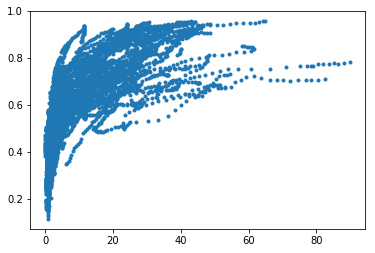

In [4]:
plt.plot(x, y, '.')

In [5]:
# add splines
knots = np.array([np.min(x), 20.0, 40.0, np.max(x)])
degree = 3
sfa.addBSpline(knots, degree, r_linear=True, bspline_mono='increasing', bspline_cvcv='concave')
sfa.addUPrior(np.array([[-10.0]*sfa.k_beta, [10.0]*sfa.k_beta]) , sfa.gama_uprior, sfa.deta_uprior)

## Fit data

In [6]:
sfa.gama_uprior = np.zeros((2, sfa.k_gama))
sfa.uprior = np.hstack((sfa.beta_uprior, sfa.gama_uprior, sfa.deta_uprior))
sfa.optimizeSFA()

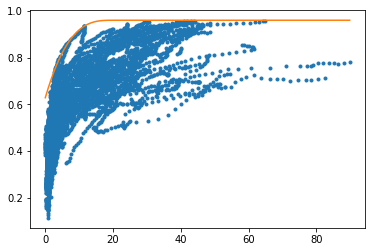

In [7]:
plt.plot(x, y, '.')
plt.plot(x, sfa.X.dot(sfa.beta_soln))

## Trimming SFA

In [8]:
sfa.optimizeSFAWithTrimming(int(0.9*sfa.N), stepsize=100.0, verbose=True, max_iter=20)

trim 0.100 of the data
iter    1, obj -3.86e+03, err 2.21e-01
iter    2, obj -3.98e+03, err 6.17e-02
iter    3, obj -4.16e+03, err 7.63e-02
iter    4, obj -4.32e+03, err 6.47e-02
iter    5, obj -4.52e+03, err 6.74e-02
iter    6, obj -4.62e+03, err 7.53e-02
iter    7, obj -4.67e+03, err 5.99e-02
iter    8, obj -4.72e+03, err 6.12e-02
iter    9, obj -4.77e+03, err 5.72e-02
iter   10, obj -4.81e+03, err 6.15e-02
iter   11, obj -4.88e+03, err 5.98e-02
iter   12, obj -4.93e+03, err 6.99e-02
iter   13, obj -4.96e+03, err 6.15e-02
iter   14, obj -4.99e+03, err 5.81e-02
iter   15, obj -5.04e+03, err 5.87e-02
iter   16, obj -5.12e+03, err 6.65e-02
iter   17, obj -5.19e+03, err 5.73e-02
iter   18, obj -5.22e+03, err 6.10e-02
iter   19, obj -5.23e+03, err 4.74e-02
iter   20, obj -5.24e+03, err 4.35e-02
trimming reach maximum number of iterations


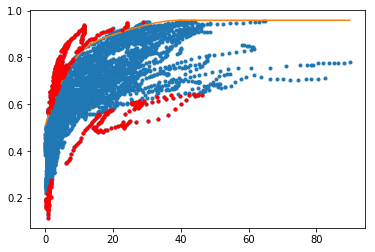

In [9]:
id_outliers = np.where(sfa.w == 0.0)[0]
plt.plot(x, y, '.')
plt.plot(x, sfa.X.dot(sfa.beta_soln))
plt.plot(x[id_outliers], y[id_outliers], 'r.')

In [10]:
np.sqrt(sfa.deta_soln)

array([0.1593902])

## Post Analysis

In [11]:
beta_sample, re_sample, y_sample, y_mean, y_negp, y_intv = predictData(sfa, include_random_effect=True, sample_size=100)

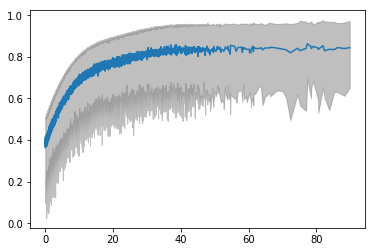

In [12]:
plt.plot(x, y_mean)
plt.fill_between(x, y_intv[:,0], y_intv[:,1], color='gray', alpha=0.5)